### Example of Reaction Constructor

Reagent A (Amine)/ Reagent B (Carboxylic Acid)

- h: hybridization ("sp3", "sp2", **"aro"**)
- X: Reacting atom (A: "NH2", "alpha", "beta"; B: "B[O]", "B[C]", "alpha", "beta")
- Y: Modification (A: "-A"; B: "-B", "-OH", "+H", "+H2")

$$
^hA^{XY}/ ^hB^{XY}
$$

In [1]:
from rxnConstructor import RxnConstructor, enumAllRxns
from rdkit import Chem
from rdkit.Chem import AllChem, Draw, PandasTools
import pandas as pd
import pickle
# Allow mol pics in dataframe
PandasTools.ChangeMoleculeRendering(renderer='PNG')
PandasTools.RenderImagesInAllDataFrames(images=True)

# Suppress waring messeges
from rdkit import RDLogger
lg = RDLogger.logger()
lg.setLevel(RDLogger.CRITICAL)

from IPython.display import display, Math

In [2]:
# Props tuple as (h, X, Y, addBeta), Y and addBeta is optional
aProps = ('sp2', 'alpha', )
bProps = ('sp2', 'B[O]','+H')

# Construct the reaction from the variables
rxnConst = RxnConstructor(aProps, bProps)
# Print out the variables
rxnConst.ReportRxnProps()

Amine
Hybridization of C : 	h = sp2
Reaction Atom(s) : 	X = alpha
Modification : 		Y = None
Number of Beta C : 	1

Carboxylic Acid
Hybridization of C : 	h = sp2
Reaction Atom(s) : 	X = B[O]
Modification : 		Y = +H
Number of Beta C : 	1

RXN Smarts: [C:3]=[C:2]-,:[N:1] . [C:8]=[C:7]-,:[C:6](-[O:5])=[O:10] >> [C:3]=[C:2]([N:1])-[O:5]-[C:6](-[C:7]=[C:8])[O:10]


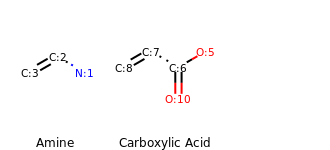

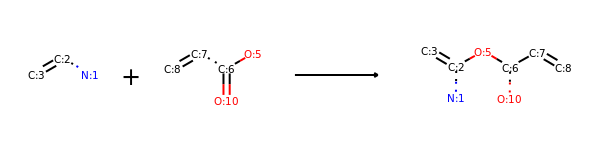

In [3]:
# Reagents (Amine and Carboxylic Acid class are based on rdkit.Mol)
reagents = [rxnConst.amine,rxnConst.carboxy]
display(Draw.MolsToGridImage(reagents, legends=['Amine','Carboxylic Acid'], 
                             subImgSize=(110, 150)))

# Reaction (Based on rdkit ChemicalReaction)
display(rxnConst.rxn)

### Enumerate all the reactions

In [20]:
rxns, rxnConds = enumAllRxns(
    
                # hybridization
                hA = ('sp3','sp2', 'aro'),
                hB = ('sp3','sp2', 'aro'),

                # reaction atom
                XA = ("NH2", "alpha", "beta"),
                XB = ("B[O]", "B[C]", "alpha", "beta"),

                # modification
                YA = (None, '-A'),
                YB = (None, '-B', '-OH', '+H', '+H2'),
                
                # add an adittional beta carbon
                addBetaA = (False,),
                addBetaB = (False,),
)


df = pd.DataFrame(rxnConds,columns=['Hybridization A', 'Rxn Atom A', 
                                    'Modification A', 'Add Beta A',
                                    'Hybridization B', 'Rxn Atom B', 
                                    'Modification B', 'Add Beta B'])
df['Reactions Smarts'] = [rxnConst.rxnSmarts for rxnConst in rxns]
#df.to_csv('enumRxns320.csv', index = False)

# Add mol and reaction objects
df['Product'] = [rxnConst.prod for rxnConst in rxns]
df['Reactions'] = [rxnConst.rxn for rxnConst in rxns]
df['Reverse'] = [rxnConst.reverse for rxnConst in rxns]

Total enumerated rxns: 15 * 48 = 720
720 reactions created


Amine
Hybridization of C : 	h = sp2
Reaction Atom(s) : 	X = beta
Modification : 		Y = -A
Number of Beta C : 	2

Carboxylic Acid
Hybridization of C : 	h = sp2
Reaction Atom(s) : 	X = beta
Modification : 		Y = +H
Number of Beta C : 	2

RXN Smarts: [C:3]=[C:2](-,:[N:1])[C:4] . [C:8]=[C:7](-,:[C:6](-[O:5])=[O:10])[C:9] >> [C:3](=[C:2][C:4])[C:8]=[C:7]([C:9])[C:6]([O:5])[O:10]


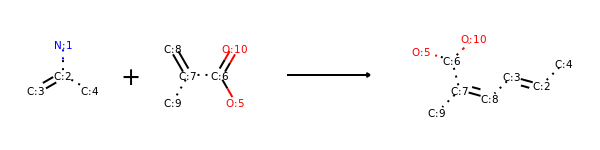

Amine
Hybridization of C : 	h = sp2
Reaction Atom(s) : 	X = beta
Modification : 		Y = -A
Number of Beta C : 	2

Carboxylic Acid
Hybridization of C : 	h = sp2
Reaction Atom(s) : 	X = beta
Modification : 		Y = +H2
Number of Beta C : 	1

RXN Smarts: [C:3]=[C:2](-,:[N:1])[C:4] . [C:8]=[C:7]-,:[C:6](-[O:5])=[O:10] >> [C:3](=[C:2][C:4])[C:8]=[C:7][C:6][O:5]


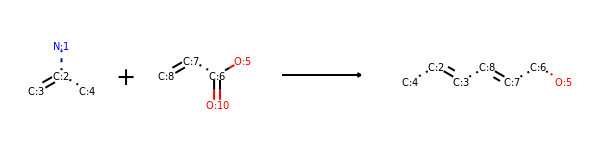

Amine
Hybridization of C : 	h = sp2
Reaction Atom(s) : 	X = beta
Modification : 		Y = -A
Number of Beta C : 	2

Carboxylic Acid
Hybridization of C : 	h = sp2
Reaction Atom(s) : 	X = beta
Modification : 		Y = +H2
Number of Beta C : 	2

RXN Smarts: [C:3]=[C:2](-,:[N:1])[C:4] . [C:8]=[C:7](-,:[C:6](-[O:5])=[O:10])[C:9] >> [C:3](=[C:2][C:4])[C:8]=[C:7]([C:9])[C:6][O:5]


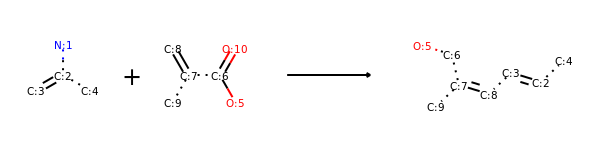

In [115]:
# display last few results
for rxnConst in rxns[-3:]:
    rxnConst.ReportRxnProps()
    display(rxnConst.rxn)

In [203]:
# Query by properties
df.query('`Hybridization A` == "aro" and `Hybridization B` == "aro"')

,Hybridization A,Rxn Atom A,Modification A,Add Beta A,Hybridization B,Rxn Atom B,Modification B,Add Beta B,Reactions Smarts,Product,Reactions,Reverse


### Apply Reactions

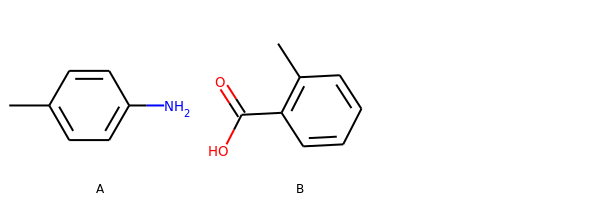

In [5]:
reagA = Chem.MolFromSmiles('NC1=CC=C(C)C=C1')
reagB = Chem.MolFromSmiles('OC(C1=C(C)C=CC=C1)=O')
reacts = (reagA,reagB)
Draw.MolsToGridImage(reacts, legends = ["A", "B"])

#### Apply a single reaction

<IPython.core.display.Math object>

Product 1


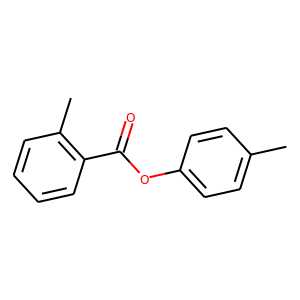

<IPython.core.display.Math object>

Product 2


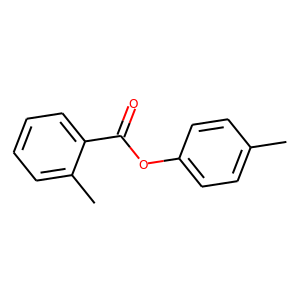

<IPython.core.display.Math object>

Product 3


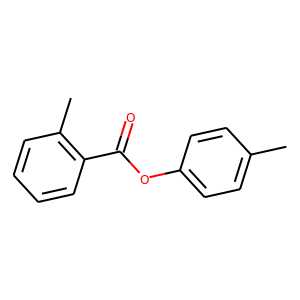

<IPython.core.display.Math object>

Product 4


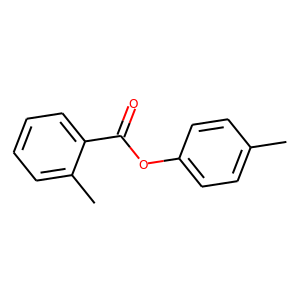

In [37]:
aProps = ('aro', 'alpha', '-A')
bProps = ('aro', 'B[O]', )
rxnConst = RxnConstructor(aProps, bProps)
singleRxn = rxnConst.rxn

rxnModStr = rxnConst.prod.GetProp('Modification')
prods = singleRxn.RunReactants(reacts)

for i,p in enumerate(prods):
    try:
        Chem.Kekulize(p[0])
        display(Math(rxnModStr))
        print('Product', i+1)
        display(Draw.MolToImage(p[0]))
    except: 
        print('Invalid mol from {}'.format(i+1))

#### Apply all reactions

In [35]:
all_smi = []
modStrs = []
for i, rxn in enumerate(df['Reactions']):
    product_list = list(rxn.RunReactants(reacts))
    rxnModStr = df['Product'][i].GetProp('Modification')
    
    if len(product_list) > 0:
        for p in product_list:
            try:
                Chem.Kekulize(p[0]) 
                smi = Chem.MolToSmiles(p[0])
                mol = Chem.MolFromSmiles(smi)
                smi = Chem.MolToSmiles(mol)
                if smi not in all_smi:
                    all_smi.append(smi)
                    modStrs.append(rxnModStr)
            except:
                pass
len(all_smi)

48

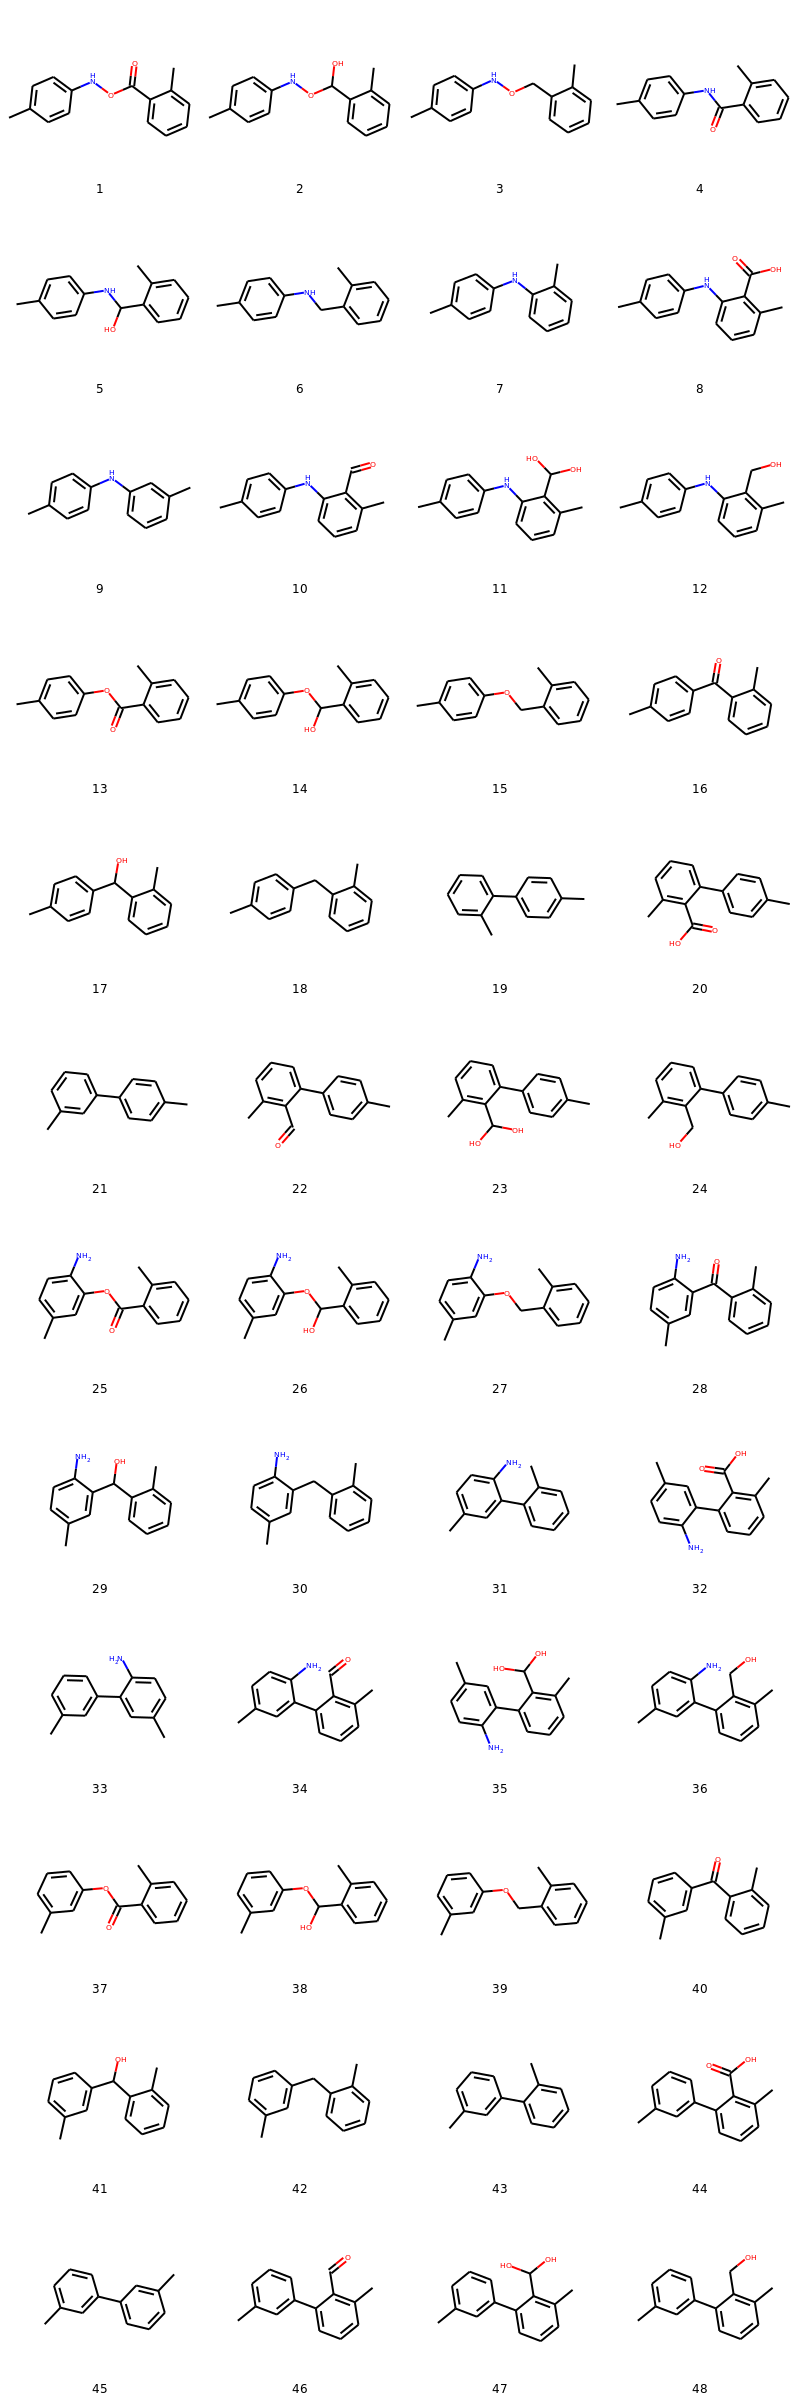

In [17]:
resultMol = [Chem.MolFromSmiles(smi) for smi in all_smi]
Draw.MolsToGridImage(resultMol, legends = [str(i+1) for i in range(len(resultMol))], molsPerRow=4)

<IPython.core.display.Math object>

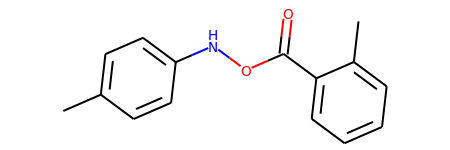

<IPython.core.display.Math object>

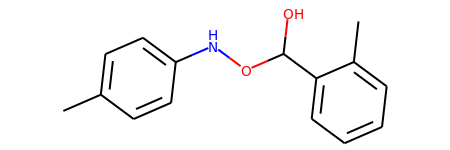

<IPython.core.display.Math object>

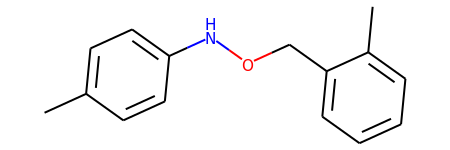

<IPython.core.display.Math object>

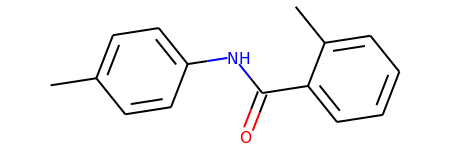

<IPython.core.display.Math object>

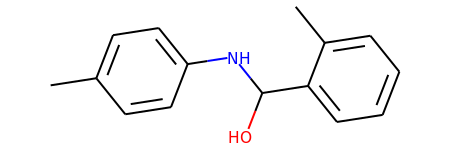

<IPython.core.display.Math object>

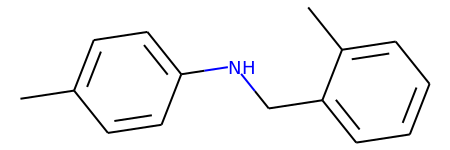

<IPython.core.display.Math object>

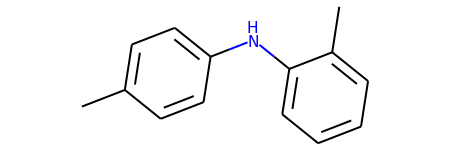

<IPython.core.display.Math object>

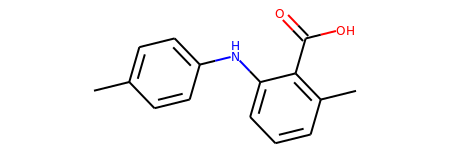

<IPython.core.display.Math object>

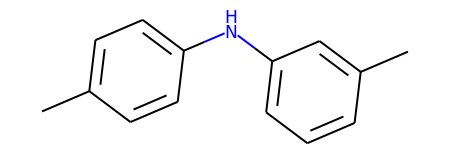

<IPython.core.display.Math object>

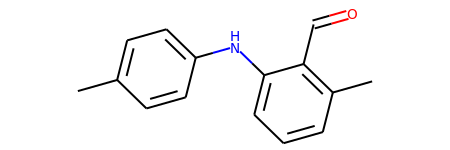

<IPython.core.display.Math object>

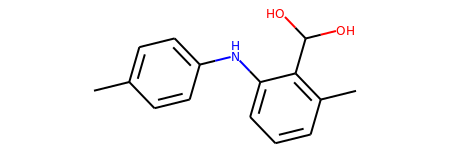

<IPython.core.display.Math object>

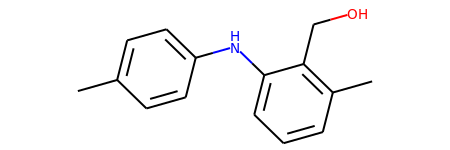

<IPython.core.display.Math object>

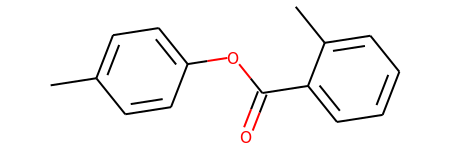

<IPython.core.display.Math object>

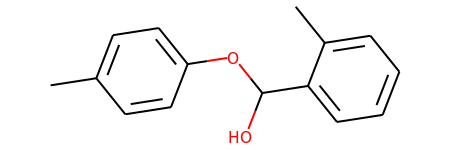

<IPython.core.display.Math object>

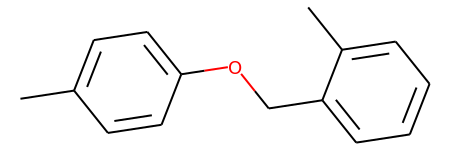

<IPython.core.display.Math object>

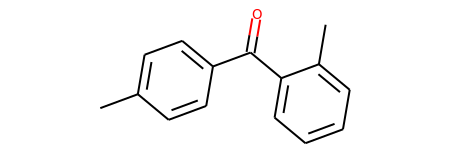

<IPython.core.display.Math object>

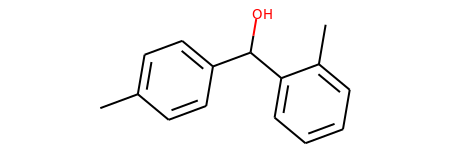

<IPython.core.display.Math object>

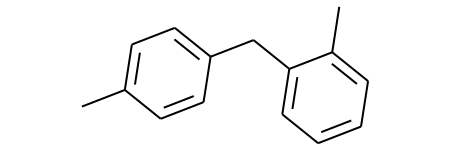

<IPython.core.display.Math object>

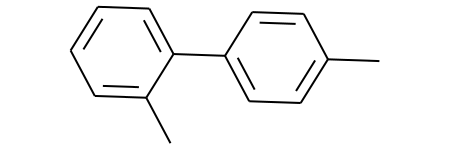

<IPython.core.display.Math object>

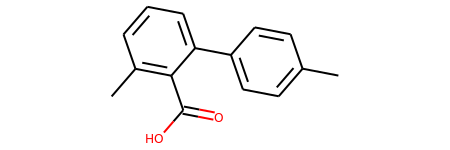

<IPython.core.display.Math object>

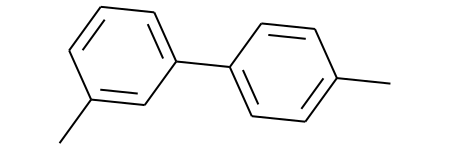

<IPython.core.display.Math object>

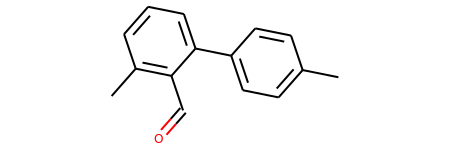

<IPython.core.display.Math object>

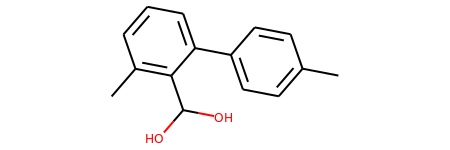

<IPython.core.display.Math object>

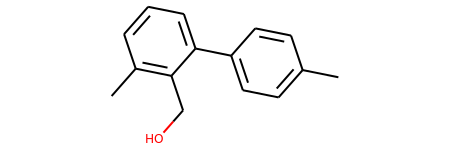

<IPython.core.display.Math object>

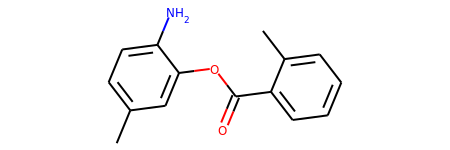

<IPython.core.display.Math object>

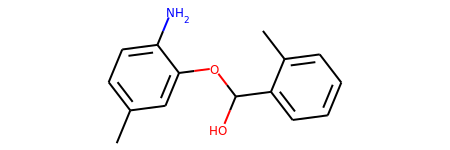

<IPython.core.display.Math object>

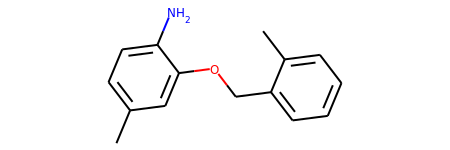

<IPython.core.display.Math object>

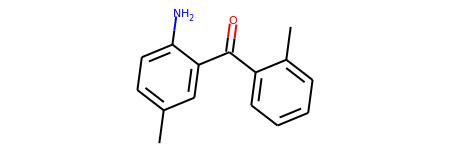

<IPython.core.display.Math object>

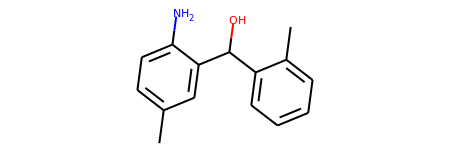

<IPython.core.display.Math object>

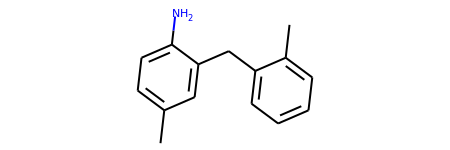

<IPython.core.display.Math object>

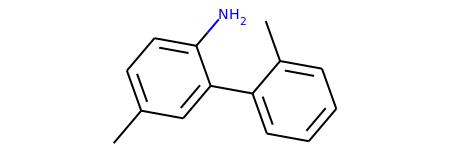

<IPython.core.display.Math object>

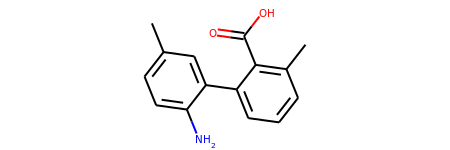

<IPython.core.display.Math object>

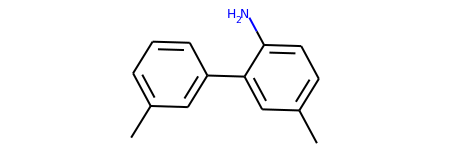

<IPython.core.display.Math object>

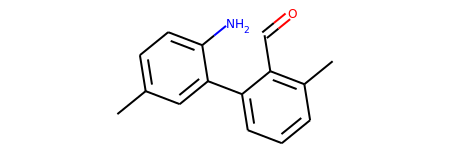

<IPython.core.display.Math object>

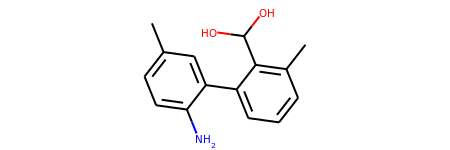

<IPython.core.display.Math object>

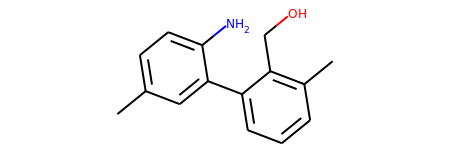

<IPython.core.display.Math object>

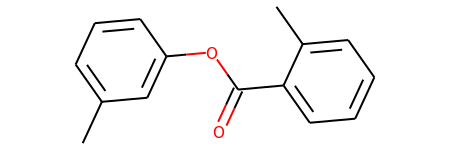

<IPython.core.display.Math object>

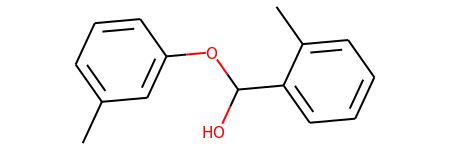

<IPython.core.display.Math object>

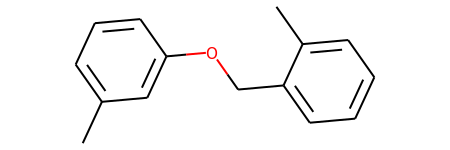

<IPython.core.display.Math object>

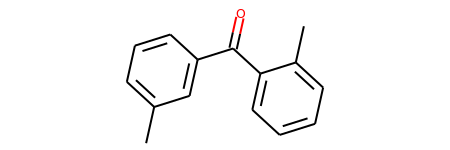

<IPython.core.display.Math object>

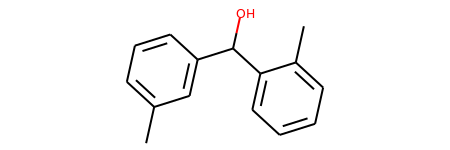

<IPython.core.display.Math object>

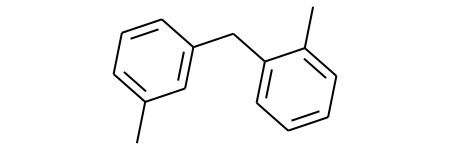

<IPython.core.display.Math object>

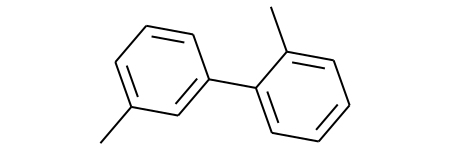

<IPython.core.display.Math object>

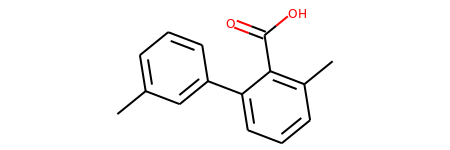

<IPython.core.display.Math object>

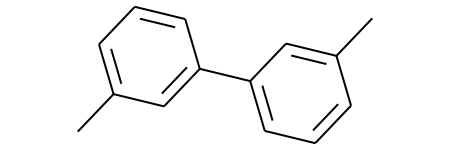

<IPython.core.display.Math object>

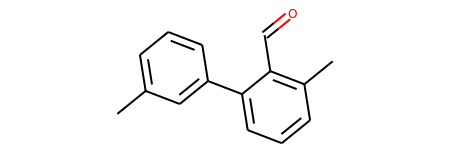

<IPython.core.display.Math object>

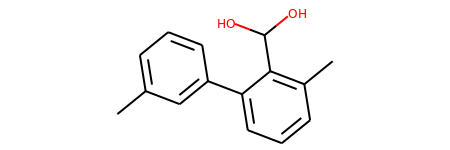

<IPython.core.display.Math object>

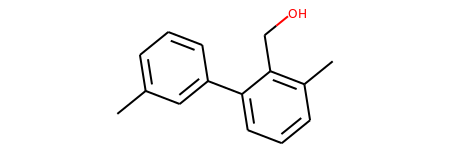

In [36]:
resultMol = [Chem.MolFromSmiles(smi) for smi in all_smi]
for i,mol in enumerate(resultMol):
    display((Math(modStrs[i])))
    display(mol)

## Find Substructure Match

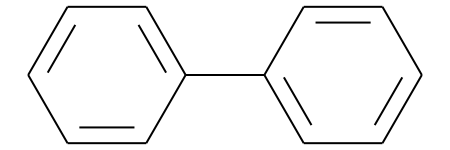

In [26]:
# Fisrt, test on biaryl
biaryl = Chem.MolFromSmiles('c1(c2ccccc2)ccccc1')
biaryl

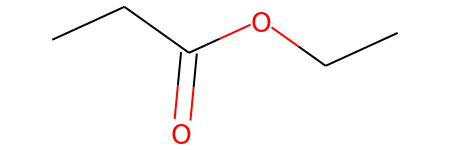

In [27]:
Chem.MolFromSmiles('CCC(=O)OCC')

Matched: 4


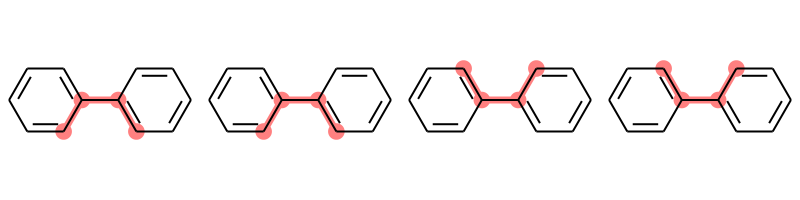

In [31]:
matches = []
rxn_idx = []
for i,prod in enumerate(df['Product']):
    match = biaryl.GetSubstructMatches(prod)
    if len(match) > 0:
        matches.append(match[1])
        rxn_idx.append(i)

print('Matched:', len(matches))


mols = [biaryl for m in matches]
pic = Draw.MolsToGridImage(mols, molsPerRow=4, subImgSize=(200, 200),
                           #legends = labels,
                           #useSVG = True, 
                           highlightAtomLists = matches)

pic

<IPython.core.display.Math object>

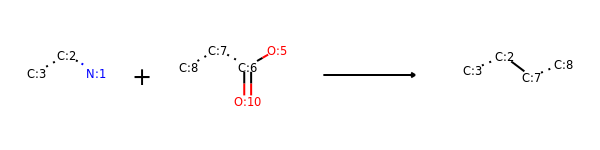

<IPython.core.display.Math object>

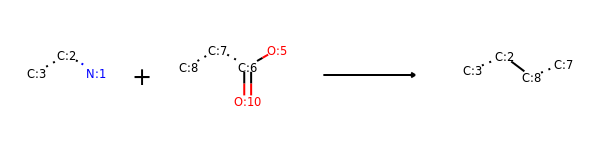

<IPython.core.display.Math object>

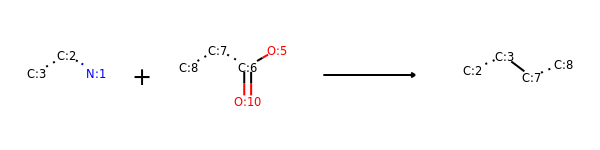

<IPython.core.display.Math object>

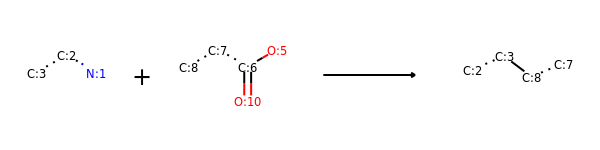

In [7]:
for i in rxn_idx:
    display(Math(df['Product'][i].GetProp('Modification')))
    display(df['Reactions'][i])

Matched: 34


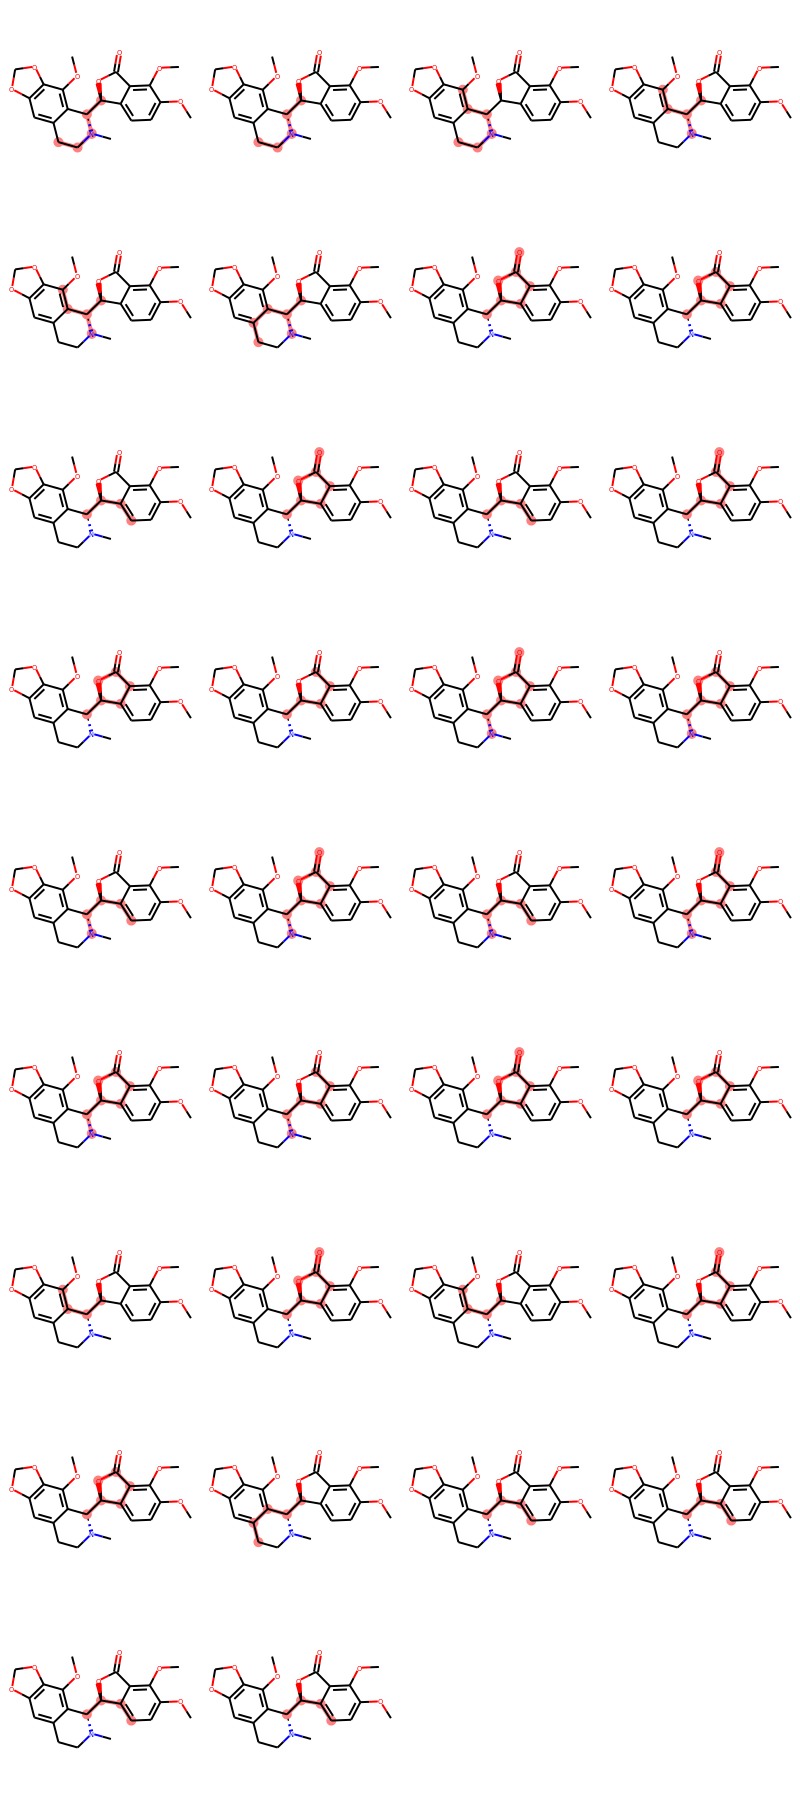

In [37]:
noscapine = Chem.MolFromSmiles("[H][C@]1([C@]2([H])C(C=CC(OC)=C3OC)=C3C(O2)=O)C4=C(OC)C5=C(OCO5)C=C4CCN1C")

#Chem.Kekulize(noscapine, clearAromaticFlags=True)

matches = []
rxn_idx = []

for i,prod in enumerate(df['Product']):
    match = noscapine.GetSubstructMatches(prod)
    if len(match) > 0:
        matches.append(match[0])
        rxn_idx.append(i)

print('Matched:', len(matches))

mols = [noscapine for m in matches]
pic = Draw.MolsToGridImage(mols, molsPerRow=4, subImgSize=(200, 200),
                           #legends = labels,
                           #useSVG = True, 
                           highlightAtomLists = matches)

pic

In [10]:
pic.save('nos_matches_34.png')

In [38]:
rrxn = df['Reverse'][rxn_idx[1]]
rreacts = list(rrxn.RunReactants([noscapine]))

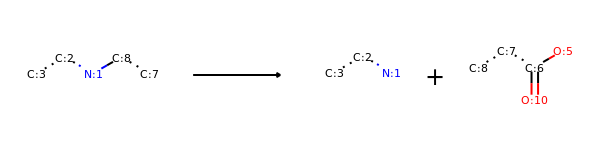

In [39]:
rrxn

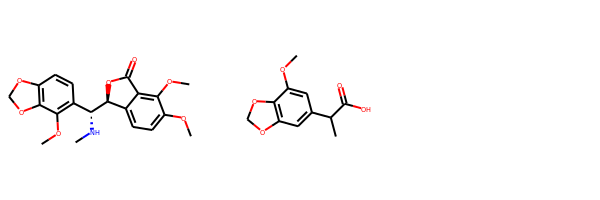

In [44]:
Draw.MolsToGridImage(rreacts[0])

In [19]:
quinine = Chem.MolFromSmiles("C=C[C@@H]1[C@@H]2CC([C@@H](C3=C(C=C(OC)C=C4)C4=NC=C3)O)[N@](C1)CC2")

Chem.Kekulize(quinine, clearAromaticFlags=True)

matches = []
for i,prod in enumerate(df['Product']):
    match = quinine.GetSubstructMatches(prod)
    if len(match) > 0:
        matches.append(match[0])

len(matches)

96

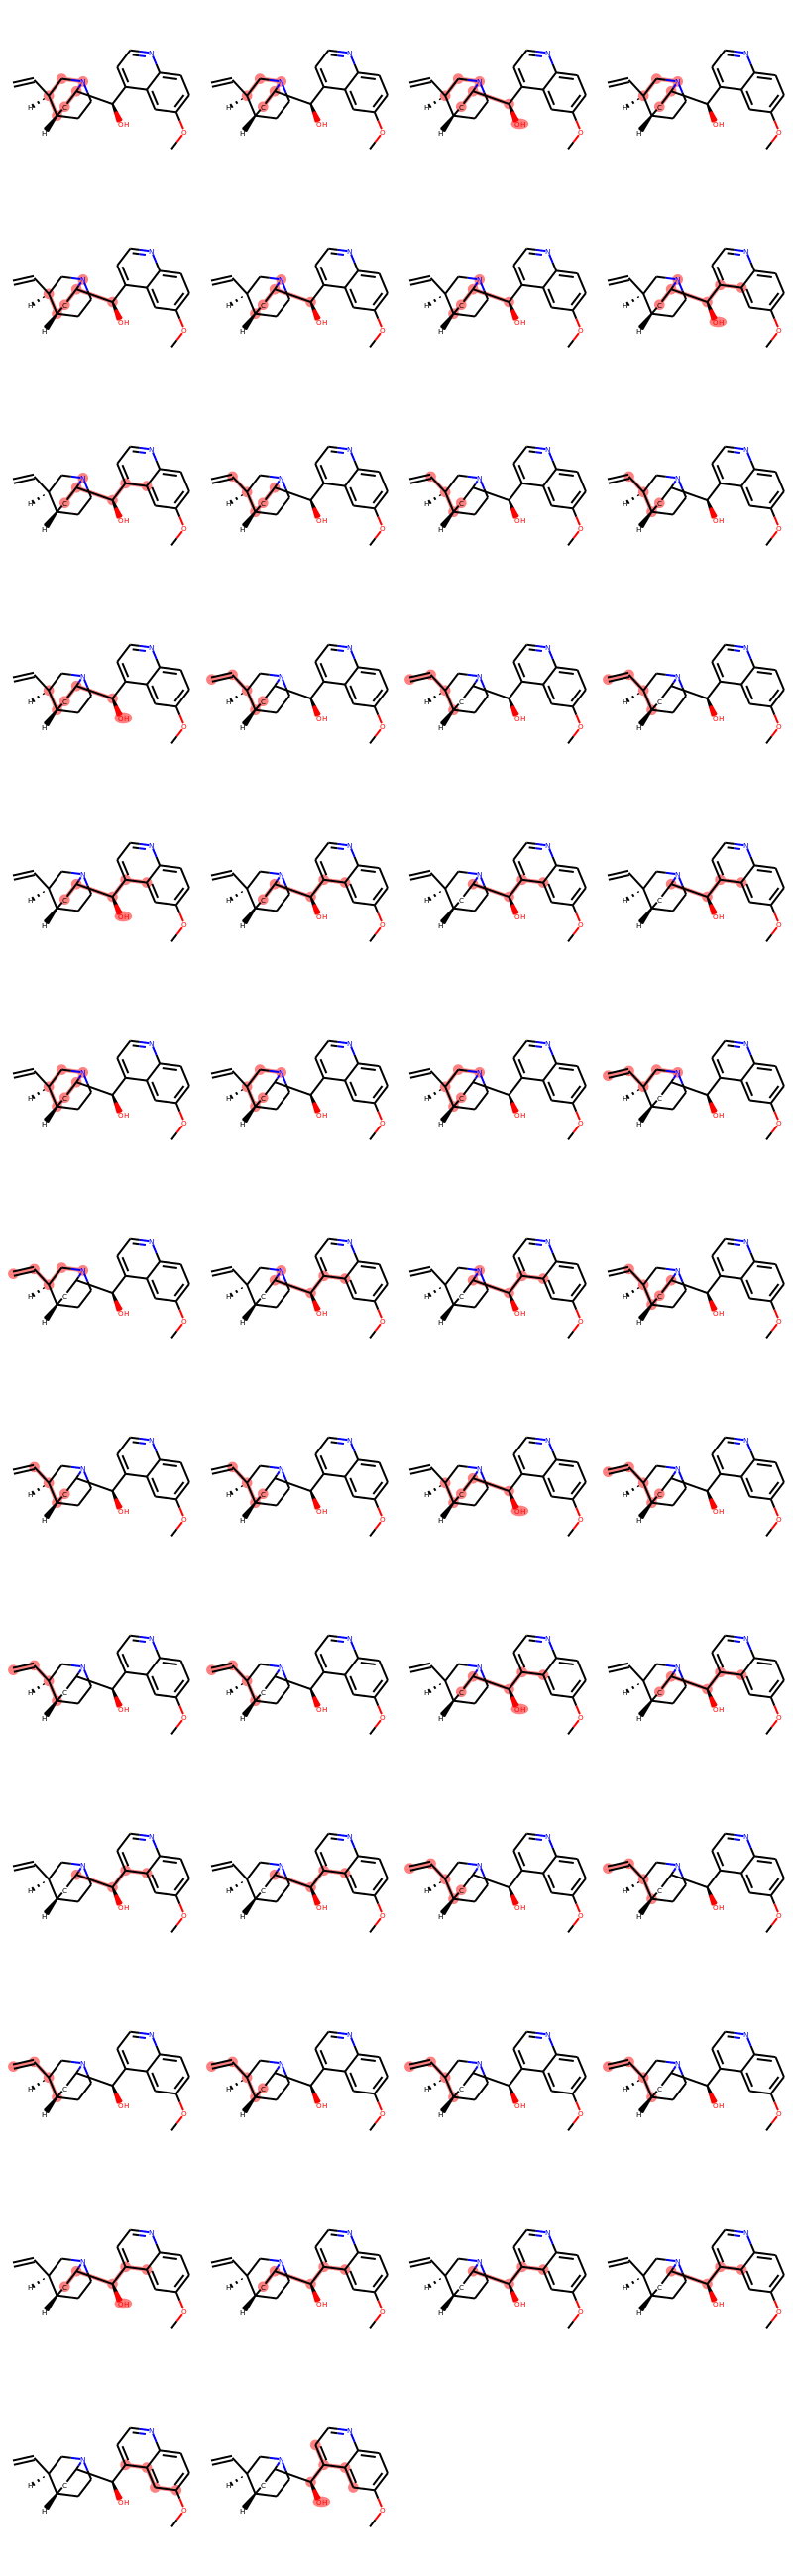

In [176]:
mols = [quinine for m in matches]
pic = Draw.MolsToGridImage(mols[:50], molsPerRow=4, subImgSize=(200, 200),
                           #legends = labels,
                           #useSVG = True, 
                           highlightAtomLists = matches[:50])

pic

In [18]:
sitagliptin = Chem.MolFromSmiles("FC1=CC(C[C@H](N)CC(N2CCN3C(C2)=NN=C3C(F)(F)F)=O)=C(F)C(F)=C1")

Chem.Kekulize(sitagliptin, clearAromaticFlags=True)

matches = []
for i,prod in enumerate(df['Product']):
    match = sitagliptin.GetSubstructMatches(prod)
    if len(match) > 0:
        matches.append(match[0])

len(matches)

55

In [217]:
matches = []
for i,prod in enumerate(df['Product']):
    match = sitagliptin.GetSubstructMatches(prod)
    if len(match) > 0:
        matches.append(match[0])

len(matches)

38

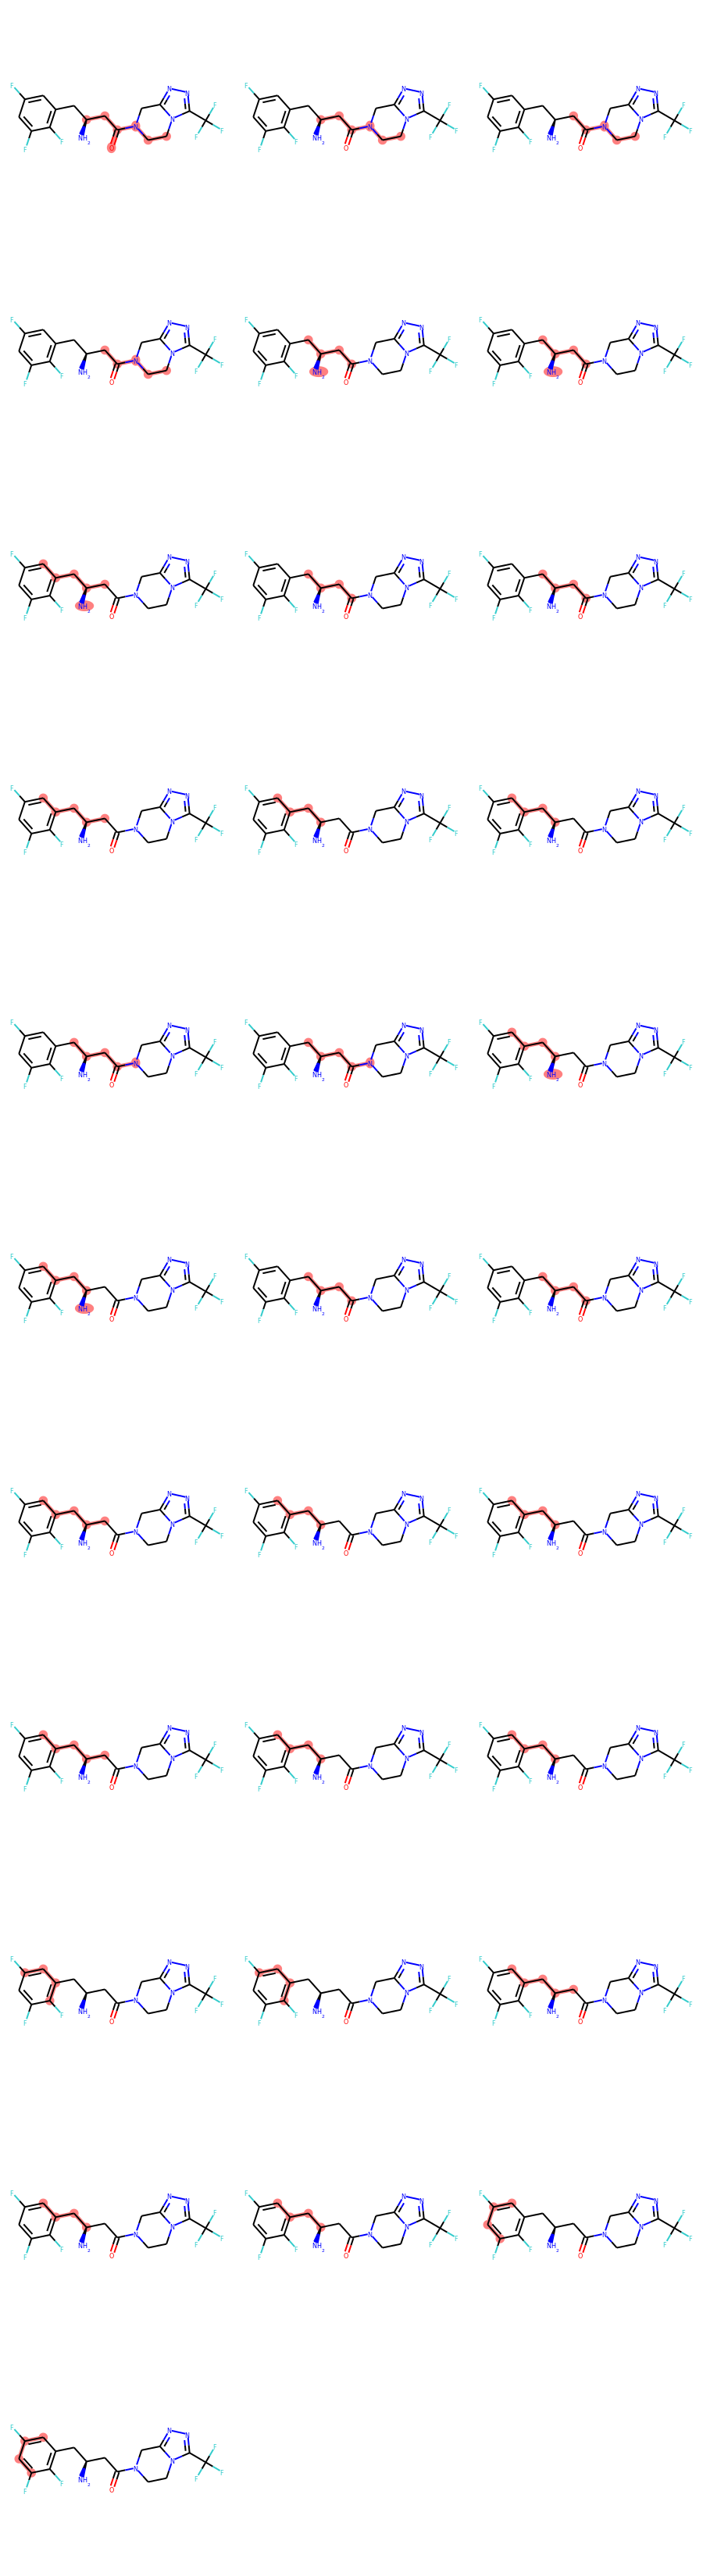

In [179]:
mols = [sitagliptin for m in matches]
pic = Draw.MolsToGridImage(mols[:50], molsPerRow=3, subImgSize=(300, 300),
                           #legends = labels,
                           #useSVG = True, 
                           highlightAtomLists = matches[:50])

pic